In [1]:
import DeepPurpose.DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *

In [2]:
X_drug, X_target, y  = process_BindingDB('./data/BindingDB_All.tsv',
                                         y = 'Kd', 
                                         binary = False, 
                                         convert_to_log = True)
drug_encoding = 'Transformer'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2])
config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 20, 
                         LR = 0.001, 
                         batch_size = 128,
                         cnn_target_filters = [32,64,96],
                         cnn_target_kernels = [4,8,12]
                        )

Loading Dataset from path...


b'Skipping line 896772: expected 193 fields, saw 205\nSkipping line 896798: expected 193 fields, saw 205\n'
b'Skipping line 929491: expected 193 fields, saw 205\n'
b'Skipping line 952161: expected 193 fields, saw 265\n'
b'Skipping line 1355895: expected 193 fields, saw 241\n'
b'Skipping line 1469800: expected 193 fields, saw 241\nSkipping line 1469801: expected 193 fields, saw 241\nSkipping line 1469802: expected 193 fields, saw 241\nSkipping line 1469803: expected 193 fields, saw 241\nSkipping line 1469804: expected 193 fields, saw 241\nSkipping line 1469805: expected 193 fields, saw 241\nSkipping line 1469806: expected 193 fields, saw 241\nSkipping line 1469807: expected 193 fields, saw 241\nSkipping line 1469808: expected 193 fields, saw 241\n'
b'Skipping line 1483073: expected 193 fields, saw 205\n'
b'Skipping line 1502296: expected 193 fields, saw 241\nSkipping line 1502297: expected 193 fields, saw 241\nSkipping line 1502298: expected 193 fields, saw 241\nSkipping line 1502299: e

Beginning Processing...
There are 70750 drug target pairs.
Default set to logspace (nM -> p) for easier regression
Drug Target Interaction Prediction Mode...
in total: 70750 drug-target pairs
encoding drug...
unique drugs: 13392
encoding protein...
unique target sequence: 1507
splitting dataset...
Done.


Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 36.6354. Total time 0.00055 hours
Training at Epoch 1 iteration 100 with loss 2.64320. Total time 0.01611 hours
Training at Epoch 1 iteration 200 with loss 1.26842. Total time 0.03138 hours
Training at Epoch 1 iteration 300 with loss 1.63710. Total time 0.04694 hours
Validation at Epoch 1 with loss:1.37575, MSE: 1.67306 , Pearson Correlation: 0.57904 with p-value: 0.0 , Concordance Index: 0.70990
Training at Epoch 2 iteration 0 with loss 1.57223. Total time 0.06388 hours
Training at Epoch 2 iteration 100 with loss 1.49711. Total time 0.07944 hours
Training at Epoch 2 iteration 200 with loss 1.59072. Total time 0.09472 hours
Training at Epoch 2 iteration 300 with loss 1.56264. Total time 0.11027 hours
Validation at Epoch 2 with loss:0.73489, MSE: 1.41631 , Pearson Correlation: 0.60190 with p-value: 0.0 , Concordance Index: 0.72317
Training at Epoch 3 iteration 0 with loss 1.56593.

Training at Epoch 19 iteration 200 with loss 1.02079. Total time 1.16972 hours
Training at Epoch 19 iteration 300 with loss 1.16734. Total time 1.18527 hours
Validation at Epoch 19 with loss:0.96852, MSE: 1.47656 , Pearson Correlation: 0.62646 with p-value: 0.0 , Concordance Index: 0.72288
Training at Epoch 20 iteration 0 with loss 1.27210. Total time 1.20222 hours
Training at Epoch 20 iteration 100 with loss 1.11423. Total time 1.2175 hours
Training at Epoch 20 iteration 200 with loss 1.27129. Total time 1.23305 hours
Training at Epoch 20 iteration 300 with loss 0.83837. Total time 1.24833 hours
Validation at Epoch 20 with loss:1.59014, MSE: 1.57291 , Pearson Correlation: 0.59812 with p-value: 0.0 , Concordance Index: 0.72277
--- Go for Testing ---
Testing MSE: 1.269539629563928 , Pearson Correlation: 0.6376112587483578 with p-value: 0.0 , Concordance Index: 0.7335739471846823
--- Training Finished ---


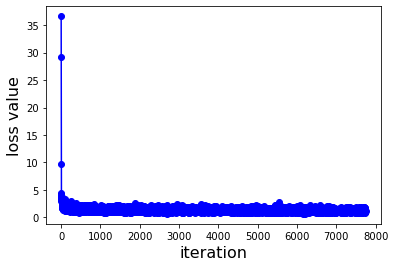

In [3]:
model = models.model_initialize(**config)
model.train(train, val, test, verbose = True)

In [4]:
model.save_model('./tutorial_model')

In [5]:
t = 'MAAEDVIICAQQCSGRCRGKSPSDCCHNQCAAGCTGPRESDCLVCRKFRDEATCKDTCPPLMLYNPTTYQMDVNPEGKYSFGATCVKKCPRNYVVTDHGSCVRACGADSYEMEEDGVRKCKKCEGPCRKVCNGIGIGEFKDSLSINATNIKHFKNCTSISGDLHILPVAFRGDSFTHTPPLDPQELDILKTVKEITGFLLIQAWPENRTDLHAFENLEIIRGRTKQHGQFSLAVVSLNITSLGLRSLKEISDGDVIISGNKNLCYANTINWKKLFGTSGQKTKIISNRGENSCKATGQVCHALCSPEGCWGPEPRDCVSCRNVSRGRECVDKCNLLEGEPREFVENSECIQCHPECLPQAMNITCTGRGPDNCIQCAHYIDGPHCVKTCPAGVMGENNTLVWKYADAGHVCHLCHPNCTYGCTGPGLEGCPTNGPKIPSIATGMVGALLLLLVVALGIGPLHGR'
t_name = 'EGFR'

In [8]:
from DeepPurpose import dataset

In [10]:
r, r_name = dataset.load_repurposing_new()

In [11]:
model = models.model_pretrained(path_dir = './tutorial_model')

In [12]:
y_pred = models.repurpose(X_repurpose = r, target = t, model = model, drug_names = r_name, target_name = t_name, 
                          result_folder = "./result/", convert_y = True)

repurposing...
Drug Target Interaction Prediction Mode...
in total: 6808 drug-target pairs
encoding drug...
unique drugs: 6806
encoding protein...
unique target sequence: 1
Done.
predicting...
---------------
Drug Repurposing Result for EGFR
+------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+---------------+
| Rank |                                                                                                               Drug Name                                                                                                               | Target Name | Binding Score |
+------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------